# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains a collection of medical appointments in Brazil and indicates if the patient showed up or not. 

* **PatientId:** creates a unique value to identify a patient. Duplications in the data can occur if the patient has made multiple appointments. 
* **AppointmentID** a unique value that indicates an appointment.
* **Gender** indicates the patient's gender. 
* **ScheduledDay** datetime value to indicate when the patient scheduled their appointment. 
* **AppointmentDay** datetime value to indicate when the appointment was scheduled for. 
* **Age** indicates patient age.
* **Neighborhood** indicates the location of the hospital.
* **Scholarship** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* **Hipertension** indicates if the patient has a history of hypertension. 
* **Diabetes** indicates if the patient has a history of diabetes. 
* **Alcoholism** indicates if the patient has a history of alcoholism. 
* **Handcap** indicates if the patient is handicap.
* **SMS_received** indicates if the patient received a reminder text message.
* **Show-up** 'No' if the patient showed up to the appointment. 'Yes' if the patient did not show up to the appointment.


### Question for Analysis

* Does having a history of diabetes, hypertension, a handicap, or alchoholism cause a patient to show up to their appointment less?
    * Which is less likely to show up?
    * Does having more than 1 factor increase the likelihood of not showing up?
* Is age a factor in showing up less?
    * Does a combination of age and having diabetes, hypertension, a handicap, or alchoholism cause less show ups?

In [40]:
#Imports Libraries and makes matplotlib appear inline.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [41]:
#Imports CSV of dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#Shows data on screen
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This operation tells us that there are 14 total columns, 1 that contains floats, 8 that contain integers and 5 that contain objects. There are a total of 110,527 rows of data. 

In [42]:
#Gets shape of data
df.shape

(110527, 14)

This output confirms that there are 14 columns and 110,527 rows.


In [43]:
# Provides additional computations for each of the columns.
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This ouput shows us that there are negative values in the age column that need to be addressed. Additionally, Handcap should output binary values of 1 and 0 to indicate true and false, however there is at least one value over 1.


In [44]:
# Validates that there are negative values in Age.
df.Age.min()


-1

This confirms that there is at least one negative value in age that will need to be addressed in cleaning.


In [45]:
# Shows the number of unique values in each column.
df.nunique()


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This output confirms that Handcap will need to be addressed, as it has 5 different values instead of the expected 2.

In [46]:
# Checks for duplicate rows
sum(df.duplicated())

0

This output indicates that there are no duplicated rows to be addressed during cleaning.

In [47]:
# Checks for null values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The output shows no null values in the dataset.

### Data Cleaning


In [48]:
# Shows rows where age is = -1
df.query('Age == "-1"')


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Our output indicates that index 99832 has an age of -1. Since it is a single column, we will drop it from our analysis.

In [49]:
# Drops negative age index.
df.drop(df.index[99832], inplace=True)

In [50]:
# Confirms index was dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


This confirms that there are now only 110,526 rows in the data, indicating that we successfully dropped one row. This information also shows us that our ScheduledDay and AppointmentDay are appearing as objects instead of datetimes. 

In [51]:
# Converts AppointmentDay and ScheduledDay to Date format 
df['AppointmentDay1'] = pd.to_datetime(df['AppointmentDay']).dt.date
df['ScheduledDay1'] = pd.to_datetime(df['ScheduledDay']).dt.date
df.drop('AppointmentDay', axis = 1, inplace = True)
df.drop('ScheduledDay', axis = 1, inplace = True)

In [52]:
# Creates column that we will use to ensure there are no Appointment dates that occur before the Scheduling date
df['datecheck'] = df.AppointmentDay1 - df.ScheduledDay1

In [53]:
# Creates column that we will use to ensure there are no Appointment dates that occur before the Scheduling date
df[df['datecheck'] < '0 days']

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDay1,ScheduledDay1,datecheck
27033,7.839273e+12,5679978,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,2016-05-10,-1 days
55226,7.896294e+12,5715660,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,2016-05-18,-1 days
64175,2.425226e+13,5664962,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,2016-05-05,-1 days
71533,9.982316e+14,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,2016-05-11,-6 days
72362,3.787482e+12,5655637,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,2016-05-04,-1 days


Our output shows that there are 5 rows that contain scheduling dates after the appointment date. Since it should not be possible to have an appointment date that occurs before the scheduling date, we will omit these from the analysis.

In [54]:
# Drops indexes where the scheduled date occurs after the appointment date
df.drop(df[df['datecheck'] < '0 days'].index, inplace = True)

In [55]:
# Validates drop was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
PatientId          110521 non-null float64
AppointmentID      110521 non-null int64
Gender             110521 non-null object
Age                110521 non-null int64
Neighbourhood      110521 non-null object
Scholarship        110521 non-null int64
Hipertension       110521 non-null int64
Diabetes           110521 non-null int64
Alcoholism         110521 non-null int64
Handcap            110521 non-null int64
SMS_received       110521 non-null int64
No-show            110521 non-null object
AppointmentDay1    110521 non-null object
ScheduledDay1      110521 non-null object
datecheck          110521 non-null timedelta64[ns]
dtypes: float64(1), int64(8), object(5), timedelta64[ns](1)
memory usage: 13.5+ MB


This output indicates that the drop was successful, giving us 110,521 rows remaining versus the 110,526 previous number of rows.

In [56]:
# Shows rows where Handcap is > 1
df.loc[df['Handcap'] > 1]

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDay1,ScheduledDay1,datecheck
946,7.282582e+13,5582483,M,94,BELA VISTA,0,1,1,0,2,1,No,2016-04-29,2016-04-14,15 days
1665,1.242919e+13,5525497,M,64,SANTA MARTHA,0,1,0,1,2,1,No,2016-04-29,2016-03-30,30 days
1666,1.242919e+13,5525498,M,64,SANTA MARTHA,0,1,0,1,2,0,No,2016-04-29,2016-03-30,30 days
2071,1.242919e+13,5640120,M,64,SANTA MARTHA,0,1,0,1,2,0,No,2016-04-29,2016-04-29,0 days
2091,1.491829e+13,5638626,F,11,ANDORINHAS,0,0,0,0,2,0,No,2016-04-29,2016-04-29,0 days
2213,3.423831e+09,5640766,F,29,VILA RUBIM,0,0,0,0,2,0,No,2016-04-29,2016-04-29,0 days
2214,2.754718e+12,5640760,M,55,DO QUADRO,0,0,0,0,3,0,No,2016-04-29,2016-04-29,0 days
2673,4.415275e+13,5589893,M,17,SANTA TEREZA,0,0,0,0,2,1,No,2016-04-29,2016-04-15,14 days
5424,1.647280e+12,5647342,M,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes,2016-05-04,2016-05-02,2 days
5467,4.555225e+12,5689883,F,10,BENTO FERREIRA,0,0,0,0,2,0,No,2016-05-16,2016-05-12,4 days


In [57]:
# Replace Handcap values of >1 with 1
def replace_values(value):
    if value > 1:
        return 1
    return value

df['Handcap'] = df['Handcap'].apply(replace_values)

In [58]:
# Validates that values >1 were replaced with 1
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,datecheck
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.020259,0.321043,10 days 04:25:27.412889
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.140884,0.466879,15 days 06:07:25.262183
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179 days 00:00:00


This output indicates that the values in excess of 1 were replaced with a value of 1.

In [59]:
# Removes columns that will not be used in the analysis
df.drop(['ScheduledDay1','AppointmentDay1','Neighbourhood','Scholarship','Gender','SMS_received', 'datecheck'], axis = 1, inplace = True)

In [60]:
# Validates column drop was successful
df.head()

,PatientId,AppointmentID,Age,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,62,1,0,0,0,No
1,5.589978e+14,5642503,56,0,0,0,0,No
2,4.262962e+12,5642549,62,0,0,0,0,No
3,8.679512e+11,5642828,8,0,0,0,0,No
4,8.841186e+12,5642494,56,1,1,0,0,No


The ouput of the head() indicates that the columns were removed successfully. 

In [61]:
# Rename columns for clarity
df.rename(columns = {'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Age':'age', 'Hipertension':'hypertension', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 'No-show':'no_show'}, inplace = True)

In [62]:
# Validate that renaming was successful
df.head()

,patient_id,appointment_id,age,hypertension,diabetes,alcoholism,handicap,no_show
0,2.987250e+13,5642903,62,1,0,0,0,No
1,5.589978e+14,5642503,56,0,0,0,0,No
2,4.262962e+12,5642549,62,0,0,0,0,No
3,8.679512e+11,5642828,8,0,0,0,0,No
4,8.841186e+12,5642494,56,1,1,0,0,No


The ouput of the head() indicates that the columns were renamed successfully. 

In [63]:
# finds the max of hypertension, diabetes, alcoholism, and handicap and assigns the value to a new column called preexisting_condition
df['preexisting_condition'] = df[['hypertension', 'diabetes', 'alcoholism', 'handicap']].max(axis = 1)

#validates column was added
df.head()

,patient_id,appointment_id,age,hypertension,diabetes,alcoholism,handicap,no_show,preexisting_condition
0,2.987250e+13,5642903,62,1,0,0,0,No,1
1,5.589978e+14,5642503,56,0,0,0,0,No,0
2,4.262962e+12,5642549,62,0,0,0,0,No,0
3,8.679512e+11,5642828,8,0,0,0,0,No,0
4,8.841186e+12,5642494,56,1,1,0,0,No,1


The ouput of the head() indicates that the preexisting condition column was created successfully and that it contains the max of hypertention, diabetes, alcoholism, and handicap.

In [64]:
# sums 'hypertension', 'diabetes', 'alcoholism', 'handicap' to determine if patient has more than 1 condition
df['number_of_conditions'] = df[['hypertension', 'diabetes', 'alcoholism', 'handicap']].sum(axis = 1)

df.describe()

,patient_id,appointment_id,age,hypertension,diabetes,alcoholism,handicap,preexisting_condition,number_of_conditions
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.197257,0.071869,0.030401,0.020259,0.238959,0.319785
std,2.560860e+14,7.129691e+04,23.109885,0.397929,0.258272,0.171690,0.140884,0.426450,0.625354
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


The ouput of the describe() indicates that number_of_conditions was created successfully with a sum of hypertention, diabetes, alchoholism, and handicap.

In [65]:
# replaces number_of_conditions where values are greater than 1 as 1 and values <= 1 as 0
df['number_of_conditions'] = df['number_of_conditions'].apply(replace_values)


In [66]:
# Validates that replacement was successful
df.describe()

,patient_id,appointment_id,age,hypertension,diabetes,alcoholism,handicap,preexisting_condition,number_of_conditions
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.197257,0.071869,0.030401,0.020259,0.238959,0.238959
std,2.560860e+14,7.129691e+04,23.109885,0.397929,0.258272,0.171690,0.140884,0.426450,0.426450
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The ouput of the describe() verifies that number_of_conditions has been updated to contain 1 if the value is 1 or more. 

In [67]:
# Renames number_of_conditions to multiple_conditions to more clearly reflect what the column contains
df.rename(columns = {'number_of_conditions':'multiple_conditions'}, inplace = True)


In [68]:
# Validates new column name was created
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 10 columns):
patient_id               110521 non-null float64
appointment_id           110521 non-null int64
age                      110521 non-null int64
hypertension             110521 non-null int64
diabetes                 110521 non-null int64
alcoholism               110521 non-null int64
handicap                 110521 non-null int64
no_show                  110521 non-null object
preexisting_condition    110521 non-null int64
multiple_conditions      110521 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 9.3+ MB


The ouput of the info() verifies that number_of_conditions has been renamed to multiple_conditions to more clearly reflect what the column indicates. 

In [69]:
# Converting patient_id and appointment_id to strings to avoid accidental computation
# Converts patient_id to string
df['patient_id'] = df['patient_id'].astype(str)

# Converts appointment_id to string
df['appointment_id'] = df['appointment_id'].astype(str)


In [70]:
# Verifies data type changes were successful
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 10 columns):
patient_id               110521 non-null object
appointment_id           110521 non-null object
age                      110521 non-null int64
hypertension             110521 non-null int64
diabetes                 110521 non-null int64
alcoholism               110521 non-null int64
handicap                 110521 non-null int64
no_show                  110521 non-null object
preexisting_condition    110521 non-null int64
multiple_conditions      110521 non-null int64
dtypes: int64(7), object(3)
memory usage: 9.3+ MB


The ouput of the info() verifies that appointment_id and patient_id are now objects.  

In [71]:
# Converts binary values to yes/no
def binary_to_nonbinary(value):
    return 'Yes' if value == 1 else 'No'

columns_to_convert = ['alcoholism', 'diabetes', 'hypertension', 'handicap', 'preexisting_condition', 'multiple_conditions']

for column in columns_to_convert:
    df[f'{column}'] = df[column].apply(binary_to_nonbinary)

In [72]:
# Confirms binary change was successful
df.head()

,patient_id,appointment_id,age,hypertension,diabetes,alcoholism,handicap,no_show,preexisting_condition,multiple_conditions
0,2.98724998243e+13,5642903,62,Yes,No,No,No,No,Yes,Yes
1,5.58997776694e+14,5642503,56,No,No,No,No,No,No,No
2,4.26296229995e+12,5642549,62,No,No,No,No,No,No,No
3,867951213174.0,5642828,8,No,No,No,No,No,No,No
4,8.84118644818e+12,5642494,56,Yes,Yes,No,No,No,Yes,Yes


The ouput of the head() shows that all binary values have been converted to yes/no.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Does having a history of diabetes, hypertension, a handicap, or alchoholism cause a patient to show up to their appointment less?

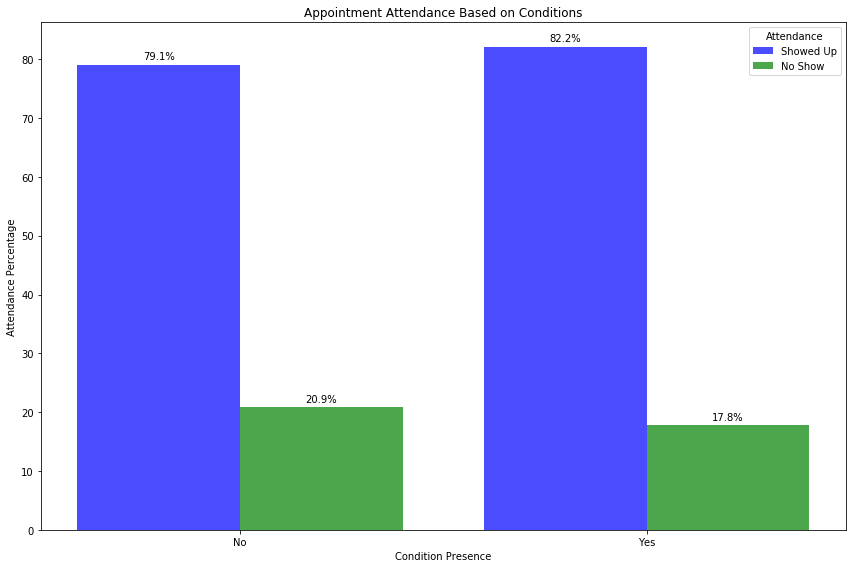

In [73]:
# Plot to illustrate if a person with a condition is more or less likely to show up than someone without a condition.
# Grouping data based on preexisting_condition and no_show
condition_data = df.groupby('preexisting_condition')['no_show'].value_counts(normalize=True) * 100

# Making percentages for no_show vs those that showed_up
showed_up_percentages = condition_data.xs('No', level=1)
no_show_percentages = condition_data.xs('Yes', level=1)

# Creating positions for the bars and setting the bar width
bar_positions = np.arange(len(showed_up_percentages))
bar_width = 0.4

# Set the figure size to make the plot larger
plt.figure(figsize=(12, 8))

# Calculating percentage labels for "Showed Up" and "No Show" above the bars
showed_up_labels = [f'{percentage:.1f}%' for percentage in showed_up_percentages]
no_show_labels = [f'{percentage:.1f}%' for percentage in no_show_percentages]

# Plotting bars for "Showed Up" and "No Show"
showed_up_bars = plt.bar(
    bar_positions - bar_width/2,
    showed_up_percentages,
    width=bar_width,
    label='Showed Up',
    color='blue',
    alpha=0.7
)
no_show_bars = plt.bar(
    bar_positions + bar_width/2,
    no_show_percentages,
    width=bar_width,
    label='No Show',
    color='green',
    alpha=0.7
)

# Function to add percentage labels above the bars
def add_percentage_labels(bars, labels):
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        plt.annotate(
            label,
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center',
            va='bottom'
        )

# Adding percentage labels above the bars
add_percentage_labels(showed_up_bars, showed_up_labels)
add_percentage_labels(no_show_bars, no_show_labels)

# Adding labels and title to the plot
plt.title('Appointment Attendance Based on Conditions')
plt.xlabel('Condition Presence')
plt.ylabel('Attendance Percentage')
plt.xticks(bar_positions, showed_up_percentages.index)
plt.legend(title='Attendance')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

This plot illustrates that a patient that does not have a condition is more likely to not show up. Naturally, this does not account for individuals that would have been diagnosed on the day of the appointment, or individuals with diagnosis outside of the conditions we are analyzing. 

### Research Question 1.2  Which condition is less likely to show up?

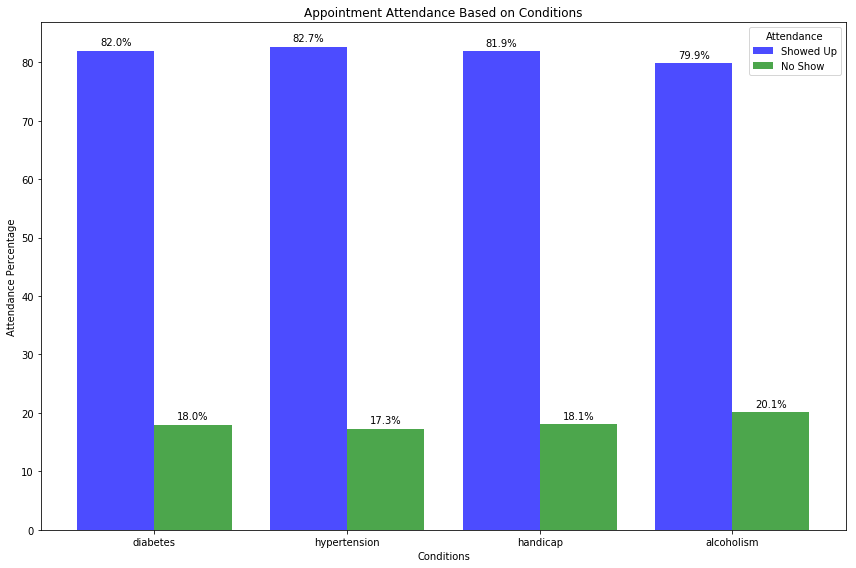

In [74]:
# Plot to illustrate if a person with a condition is more or less likely to show up than someone without a condition.
# Grouping data based on conditions and no_show
conditions = ['diabetes', 'hypertension', 'handicap', 'alcoholism']
attendance_data = []

# Calculating attendance percentages for each condition
for condition in conditions:
    condition_data = df[df[condition] == 'Yes']['no_show'].value_counts(normalize=True) * 100
    attendance_data.append(condition_data)

# Creating a DataFrame to hold the attendance data for each condition
attendance_df = pd.DataFrame(attendance_data, index=conditions)

# Defining positions for the bars and the bar width
bar_positions = np.arange(len(attendance_df))
bar_width = 0.4

# Set the figure size to make the plot larger
plt.figure(figsize=(12, 8))

# Plotting bars for "Showed Up" and "No Show"
showed_up_bars = plt.bar(
    bar_positions - bar_width/2,
    attendance_df['No'],
    width=bar_width,
    label='Showed Up',
    color='blue',
    alpha=0.7
)
no_show_bars = plt.bar(
    bar_positions + bar_width/2,
    attendance_df['Yes'],
    width=bar_width,
    label='No Show',
    color='green',
    alpha=0.7
)

# Function to calculate percentage labels for a condition
def get_percentage_labels(condition_data):
    return [f'{percentage:.1f}%' for percentage in condition_data]

# Adding percentage labels above the bars
for condition_position, condition in enumerate(conditions):
    add_percentage_labels(
        [showed_up_bars[condition_position], no_show_bars[condition_position]],
        get_percentage_labels(attendance_df.loc[condition])
    )

# Adding labels and title to the plot
plt.title('Appointment Attendance Based on Conditions')
plt.xlabel('Conditions')
plt.ylabel('Attendance Percentage')
plt.xticks(bar_positions, conditions)
plt.legend(title='Attendance')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

The output of this plot shows us that an individual that has issues with alcoholism is slightly less likely to show up to their appointment than people with other conditions. 

### Research Question 2  Does having more than 1 factor increase the likelihood of not showing up?

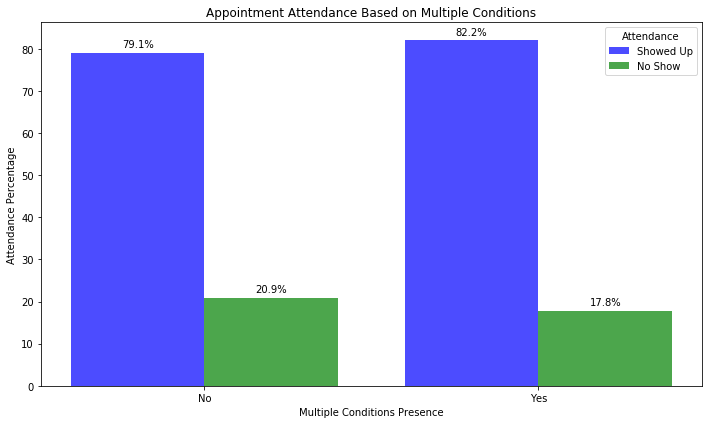

In [75]:
# Grouping data based on the presence of multiple conditions and whether or not they showed up
condition_data = df.groupby('multiple_conditions')['no_show'].value_counts(normalize=True) * 100

# Getting the percentage of those who showed up versus those who didn't
showed_up_percentages = condition_data.xs('No', level=1)
no_show_percentages = condition_data.xs('Yes', level=1)

# Defining positions for the bars and the bar width
bar_positions = np.arange(len(showed_up_percentages))
bar_width = 0.4

# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Plotting bars for "Showed Up" and "No Show"
showed_up_bars = plt.bar(
    bar_positions - bar_width/2,
    showed_up_percentages,
    width=bar_width,
    label='Showed Up',
    color='blue',
    alpha=0.7
)
no_show_bars = plt.bar(
    bar_positions + bar_width/2,
    no_show_percentages,
    width=bar_width,
    label='No Show',
    color='green',
    alpha=0.7
)

# Reusing the function to add percentage labels above the bars
add_percentage_labels(showed_up_bars, get_percentage_labels(showed_up_percentages))
add_percentage_labels(no_show_bars, get_percentage_labels(no_show_percentages))

# Adding labels and title to the plot
plt.title('Appointment Attendance Based on Multiple Conditions')
plt.xlabel('Multiple Conditions Presence')
plt.ylabel('Attendance Percentage')
plt.xticks(bar_positions, showed_up_percentages.index)
plt.legend(title='Attendance')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

By the output of this plot we can hypothesize that having multiple conditions actually makes you more likely to show up to your appointment than those with 1 or less conditions.

### Research Question 3  Is age a factor in showing up less?

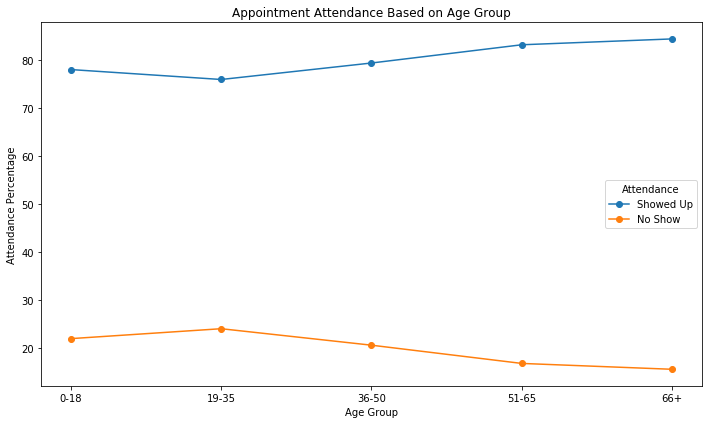

In [76]:
# Create bin for age groups
bins = [0, 18, 35, 50, 65, np.inf]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Grouping data based on age group and appointment attendance
condition_data = df.groupby('age_group')['no_show'].value_counts(normalize=True) * 100

# Extracting the percentage of those who showed up and those who didn't
showed_up_percentages = condition_data.xs('No', level=1)
no_show_percentages = condition_data.xs('Yes', level=1)

# Creating positions for the x-axis (age groups)
age_groups = showed_up_percentages.index
x_positions = np.arange(len(age_groups))

# Set the figure size to make the plot larger
plt.figure(figsize=(10, 6))

# Plotting lines for "Showed Up" and "No Show"
plt.plot(x_positions, showed_up_percentages, marker='o', label='Showed Up')
plt.plot(x_positions, no_show_percentages, marker='o', label='No Show')

# Adding labels and title to the plot
plt.title('Appointment Attendance Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attendance Percentage')
plt.xticks(x_positions, age_groups)
plt.legend(title='Attendance')

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

By the output of this plot we can hypothesize that being younger in age makes you less likely to show up to your appointment. 

### Research Question 3.2  Does a combination of age and having a preexisting condition cause less show ups?

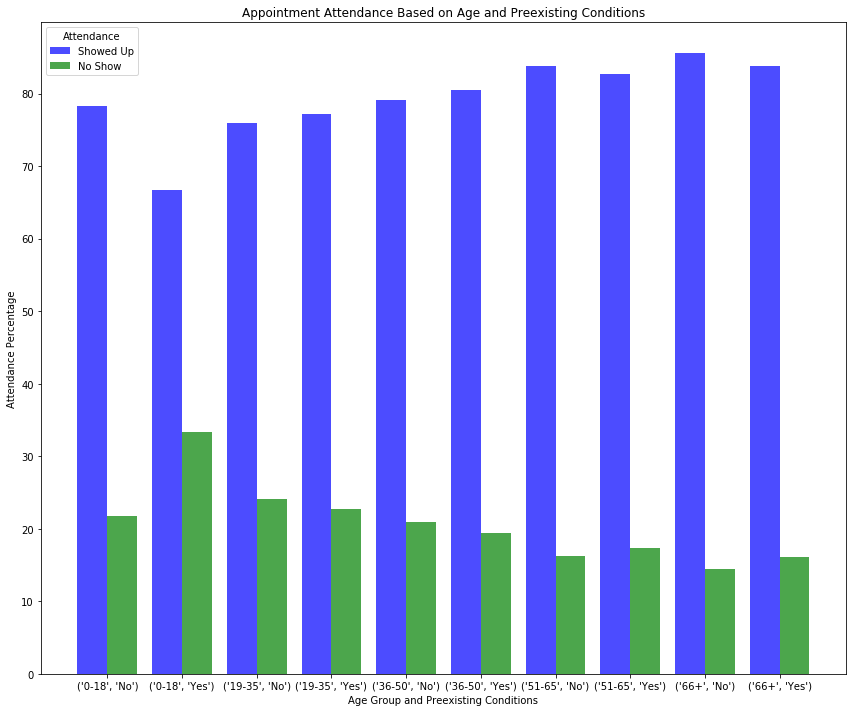

In [77]:
# Grouping data based on age group, preexisting conditions, and appointment attendance
condition_data = df.groupby(['age_group', 'preexisting_condition'])['no_show'].value_counts(normalize=True) * 100

# Extracting the percentage of those who showed up and those who didn't
showed_up_percentages = condition_data.xs('No', level=2)
no_show_percentages = condition_data.xs('Yes', level=2)

# Creating positions for the bars
bar_positions = np.arange(len(showed_up_percentages))

# Set the figure size to make the plot larger
plt.figure(figsize=(12, 10))

# Plotting bars for "Showed Up" and "No Show"
bar_width = 0.4
plt.bar(
    bar_positions - bar_width/2,
    showed_up_percentages,
    width=bar_width,
    label='Showed Up',
    color='blue',
    alpha=0.7
)
plt.bar(
    bar_positions + bar_width/2,
    no_show_percentages,
    width=bar_width,
    label='No Show',
    color='green',
    alpha=0.7
)

# Adding labels and title to the plot
plt.title('Appointment Attendance Based on Age and Preexisting Conditions')
plt.xlabel('Age Group and Preexisting Conditions')
plt.ylabel('Attendance Percentage')
plt.xticks(bar_positions, showed_up_percentages.index)
plt.legend(title='Attendance', labels=['Showed Up', 'No Show'])

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()

By the output of this chart, we can hypothesize that having a preexisting condition and being of a certain age group does not correlate with showing up more or less. 


<a id='conclusions'></a>
## Conclusions

This analysis reviewed medical appointment attendance data. Our goal was to gain insight into the factors that influence patient attendance. These correlations are not conclusive and could be influenced by other factors, which we will address below. We used the following questions to gain this insight: 

Question 1: Does having a history of diabetes, hypertension, a handicap, or alcoholism cause a patient to show up to their appointment less?

Our Analysis determined that patients with a preexisting condition are slightly more likely to show up to their appointments than those that do not have a preexisting condition. Patients with a history of alcoholism showed slightly lower attendance rates. 

Question 2: Does having more than 1 factor increase the likelihood of not showing up?

Contrary to my expectations, patients with multiple preexisting conditions were more likely to show up to their appointments than those with no conditions or a single condition. 

Question 3: Is age a factor in showing up less?

The analysis showed us that younger patients (0-18 and 19-35) were slightly less likely to show up to their appointments than the older age groups. We, also, illustrated that the combined effects of age and preexisting condition did not have a clear correlation with lower or higher attendance rates. 

In conclusion, our analysis suggests that the presence of preexisting conditions, age, and the conbination of the two may have minor effects on attendance to medical appointments. 

### Limitations
In our analysis, we noted several confounding factors that may influence the output of the analysis, if they had been utilized. Such as: 

The day of the week: The day of the week could impact appointment attendance. Weekend appointments may have had higher attendance for those working Monday through Friday etc. 

Time of day: Patients may be more or less likely to show up for appointments in the morning or evening. 

Distance: The distance from the patient's home to their doctor's office may make them more or less likely to attend. 

Transportation availability: A patient having access to transportation may impact their ability to attend their appointment. 

This demonstrates some of the factors that could influence the data. 

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0